In [ ]:
import pandas as pd
import pickle
import numpy as np
from pathlib import Path
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import shutil

%matplotlib inline

In [ ]:
root = Path('../output/runs')

CLASSES = ['HTC-1-M7', 'LG-Nexus-5x', 'Motorola-Droid-Maxx', 'Motorola-Nexus-6', 'Motorola-X',
           'Samsung-Galaxy-Note3', 'Samsung-Galaxy-S4', 'Sony-NEX-7', 'iPhone-4s', 'iPhone-6']

# TEST

In [130]:
def atest(run):
    csv_path = str(root/run/Path('predict_test.csv'))
    df = pd.read_csv(csv_path)
    pred_counts = df['camera'].value_counts()
    pred_counts /= 0.01 * df.shape[0]

    preds, fnames = pickle.load(open(str(root/run/'predict_test_detailed.pkl'),'rb'))
    preds, fnames = np.vstack(preds), np.array(fnames)
    pred_classes = np.argmax(preds, axis=1)
#     for cls, cnt in zip(*np.unique(pred_classes, return_counts=True)):
#         print('{}\n\t{}\t{:.2f}%'.format(CLASSES[cls], cnt, 100*cnt / len(preds)))
    class_id = CLASSES.index('LG-Nexus-5x')
    mask = pred_classes == class_id
    class_probs = preds[mask, :].max(axis=1)
    plt.hist(class_probs, 50)
    
    if True:
        dst_dir = Path('/tmp/poor_pred')
        if dst_dir.exists():
            shutil.rmtree(str(dst_dir))
        dst_dir.mkdir(exist_ok=True)
        for src in fnames[np.bitwise_and(mask, preds[:, class_id] < 4)]:
            src = Path(str(src))
            shutil.copy(str(Path('../')/src), str(dst_dir/(src.stem+'.png')))
    
    #class_id = CLASSES.index('Motorola-X')
    #mask = pred_classes == class_id
    #plt.hist(preds[mask, :].max(axis=1), 50)
        
    return pred_counts

In [121]:
atest('resnet50_random_crop')

Motorola-Nexus-6        11.590909
Motorola-Droid-Maxx     10.643939
Motorola-X              10.340909
Samsung-Galaxy-Note3    10.340909
Samsung-Galaxy-S4       10.227273
Sony-NEX-7              10.037879
iPhone-4s                9.583333
HTC-1-M7                 9.431818
iPhone-6                 9.393939
LG-Nexus-5x              8.409091
Name: camera, dtype: float64

In [122]:
atest('resnet50_random_crop_sometimes_0.3')

Motorola-Droid-Maxx     11.439394
Motorola-Nexus-6        11.325758
Sony-NEX-7              10.643939
Motorola-X              10.416667
Samsung-Galaxy-S4       10.378788
HTC-1-M7                10.189394
Samsung-Galaxy-Note3     9.772727
iPhone-6                 9.507576
iPhone-4s                9.356061
LG-Nexus-5x              6.969697
Name: camera, dtype: float64

In [123]:
atest('resnet50_random_crop_sometimes_0.5')

Motorola-Nexus-6        11.780303
Motorola-Droid-Maxx     11.401515
Motorola-X              10.378788
iPhone-4s               10.189394
iPhone-6                10.113636
Samsung-Galaxy-S4        9.886364
HTC-1-M7                 9.734848
Samsung-Galaxy-Note3     9.696970
Sony-NEX-7               9.583333
LG-Nexus-5x              7.234848
Name: camera, dtype: float64

In [124]:
atest('resnet50_adam_lr_1e-3_rand_crop_lr_ch_3')

Motorola-Nexus-6        13.409091
Motorola-Droid-Maxx     12.272727
Samsung-Galaxy-S4       10.643939
Sony-NEX-7              10.606061
Motorola-X              10.265152
iPhone-6                 9.848485
iPhone-4s                9.280303
HTC-1-M7                 8.787879
Samsung-Galaxy-Note3     8.522727
LG-Nexus-5x              6.363636
Name: camera, dtype: float64

In [125]:
atest('resnet50_adam_lr_1e-3_rand_crop')

Motorola-Droid-Maxx     13.106061
Motorola-Nexus-6        11.666667
Samsung-Galaxy-S4       10.946970
Motorola-X              10.454545
Sony-NEX-7              10.265152
Samsung-Galaxy-Note3     9.545455
iPhone-6                 9.469697
HTC-1-M7                 9.242424
iPhone-4s                7.954545
LG-Nexus-5x              7.348485
Name: camera, dtype: float64

In [127]:
atest('resnet50_class_aware')

Motorola-Nexus-6        11.174242
Motorola-Droid-Maxx     11.060606
Motorola-X              10.378788
iPhone-4s               10.303030
Samsung-Galaxy-S4       10.265152
Samsung-Galaxy-Note3    10.265152
HTC-1-M7                10.000000
Sony-NEX-7               9.810606
iPhone-6                 9.356061
LG-Nexus-5x              7.386364
Name: camera, dtype: float64

Motorola-Nexus-6        11.022727
Motorola-Droid-Maxx     10.946970
Samsung-Galaxy-Note3    10.681818
HTC-1-M7                10.340909
Samsung-Galaxy-S4       10.151515
iPhone-4s               10.075758
Motorola-X              10.075758
iPhone-6                10.075758
Sony-NEX-7               9.393939
LG-Nexus-5x              7.234848
Name: camera, dtype: float64

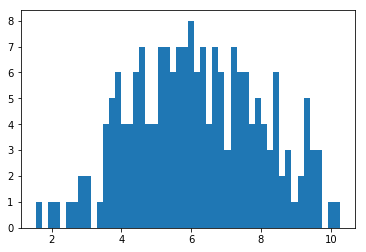

In [131]:
atest('dense121_512')

Motorola-Nexus-6        11.742424
iPhone-6                10.454545
HTC-1-M7                10.303030
Motorola-Droid-Maxx     10.265152
iPhone-4s               10.227273
Samsung-Galaxy-S4       10.151515
Samsung-Galaxy-Note3    10.151515
Motorola-X              10.037879
Sony-NEX-7              10.037879
LG-Nexus-5x              6.628788
Name: camera, dtype: float64

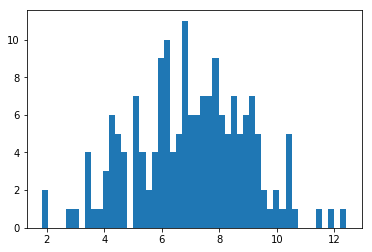

In [135]:
atest('dense121_512_lr_2e-4')

Motorola-Nexus-6        12.234848
Motorola-Droid-Maxx     10.946970
Samsung-Galaxy-S4       10.454545
Motorola-X              10.265152
iPhone-4s               10.151515
Samsung-Galaxy-Note3     9.924242
Sony-NEX-7               9.848485
iPhone-6                 9.696970
HTC-1-M7                 9.659091
LG-Nexus-5x              6.818182
Name: camera, dtype: float64

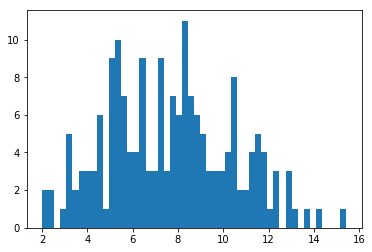

In [136]:
atest('dense121_mul_fc_lr')

Motorola-Nexus-6        11.439394
Motorola-Droid-Maxx     11.439394
Sony-NEX-7              10.492424
Motorola-X              10.303030
Samsung-Galaxy-Note3    10.151515
iPhone-6                10.000000
Samsung-Galaxy-S4        9.810606
iPhone-4s                9.772727
HTC-1-M7                 9.734848
LG-Nexus-5x              6.856061
Name: camera, dtype: float64

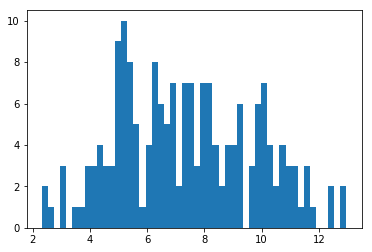

In [137]:
atest('dense121_mul_fc_lr_no_rot')

# VALID

In [ ]:
def plot_confusion_matrix(cm, classes=CLASSES,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def avalid(run):
    data = pickle.load(open(str(root / run / 'predict_valid.pkl'), 'rb'))
    preds, targets, manips = [np.array(d) for d in data]
    
    mask = manips != -1
    acc_manip = np.mean(np.argmax(preds[mask,:], axis=1) == targets[mask])
    acc_unalt = np.mean(np.argmax(preds[~mask,:], axis=1) == targets[~mask])
    print('Predictions\t{}'.format(preds.shape[0]))
    print('Acc unalt\t{}\nAcc manip\t{}\nAcc\t{}'.format(acc_unalt, acc_manip, 0.7*acc_unalt+0.3*acc_manip))
    
    y_pred = np.argmax(preds, axis=1)
    y_true = targets
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cnf_matrix, classes=CLASSES, normalize=True)

In [ ]:
avalid('resnet50_refine_nexus_5x_no_sea_repeat_4')

In [ ]:
avalid('resnet50_random_crop')

Predictions	4000
Acc unalt	0.9471991423210936
Acc manip	0.8810408921933085
Acc	0.927351667282758
Normalized confusion matrix


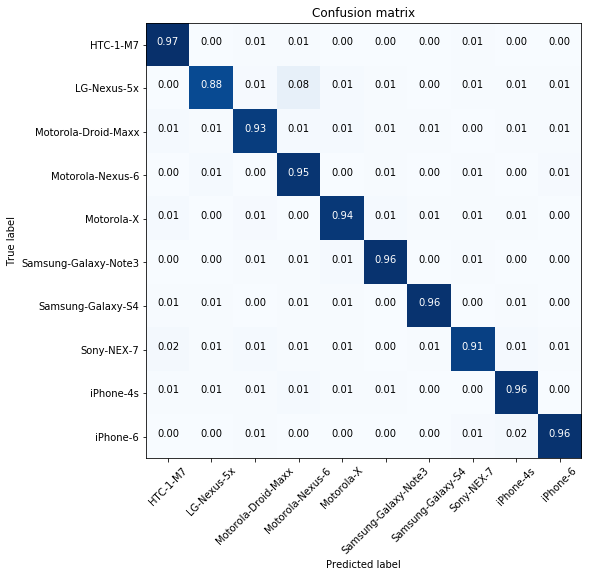

In [134]:
avalid('dense121_512_lr_2e-4')